In [1]:
from metodos.SSLTree.utils.Experiments import cross_val, cross_val_ssl, names

from scipy.stats import rankdata
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import scikit_posthocs as sp

# Comparativa entre SSLTree, DT y SelfTraining

In [2]:
# entropy = shannon
# gini
CRITERION = "entropy"

In [ ]:
all_means = {}

for i, p in enumerate(["10", "20", "30", "40"]):
    print("PERCENTAGE:", p)
    means_ssl = []
    means_dt = []
    means_st = []
    for name in names:
        print("\tDATASET:", name)
        m_ssl, m_dt, m_st = cross_val(name, p, criterion=CRITERION)

        np.save(f"comparativa/{CRITERION}/{p}/{name}_means.npy", np.array([m_ssl, m_dt, m_st]))

        means_ssl.append(m_ssl)
        means_dt.append(m_dt)
        means_st.append(m_st)

    all_means[p] = np.stack((means_ssl, means_dt, means_st))
np.save(f"comparativa/{CRITERION}/all_means.npy", all_means)
print("Resultados guardados")

In [104]:
def plot_comparativa(name):
    means = []
    for p in ["10", "20", "30", "40"]:
        means.append(np.load(f"comparativa/{CRITERION}/{p}/{name}_means.npy"))
    means = np.array(means).T
    
    classifiers = ["SSLTree", "DecisionTree", "SelfTraining"]
    for j, classifier in enumerate(classifiers):
        plt.plot(["10%", "20%", "30%", "40%"], means[j],marker='o', label=classifier)
    
    plt.xlabel("Porentaje de etiquetados")
    plt.ylabel("Accuracy")
    plt.title("Dataset: " + name)
    
    plt.legend()
    plt.show()

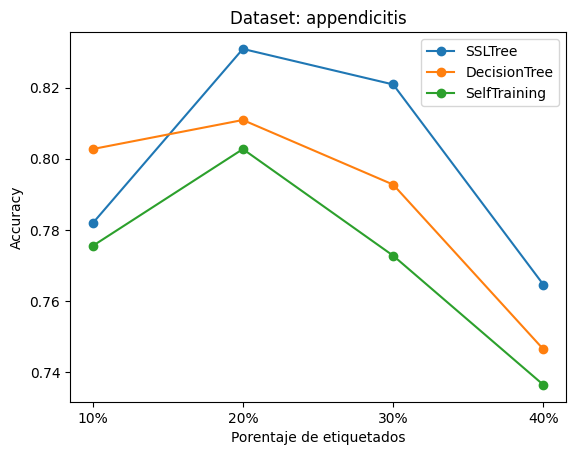

In [105]:
plot_comparativa("appendicitis")

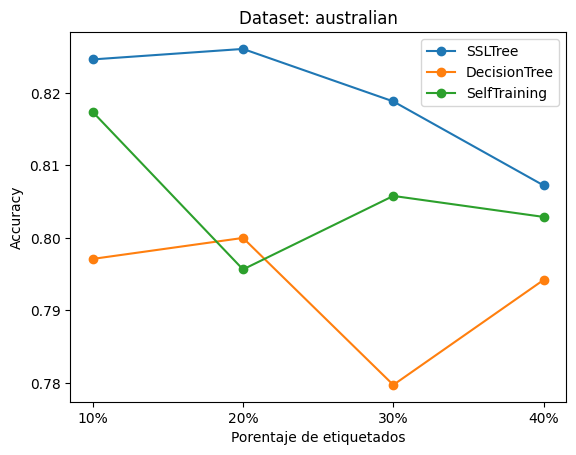

In [108]:
plot_comparativa("australian")

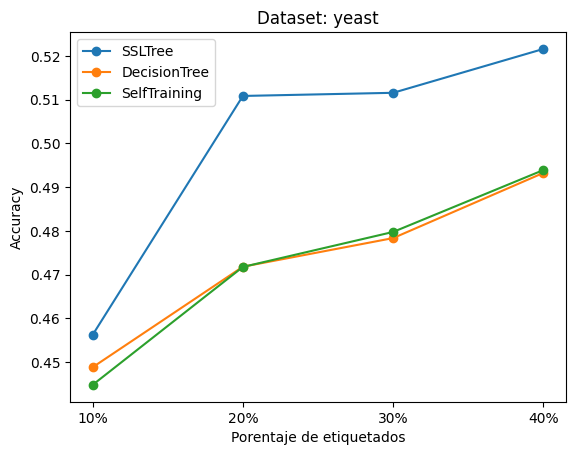

In [107]:
plot_comparativa("yeast")

In [3]:
all_means = np.load(f"comparativa/{CRITERION}/all_means.npy", allow_pickle=True).item()
all_mean_rankings = np.empty((3, 4))

for i, p in enumerate(["10", "20", "30", "40"]):
    rankings = rankdata(-all_means[p], method="average", axis=0)
    
    all_mean_rankings[:, i] = np.mean(rankings, axis=1)

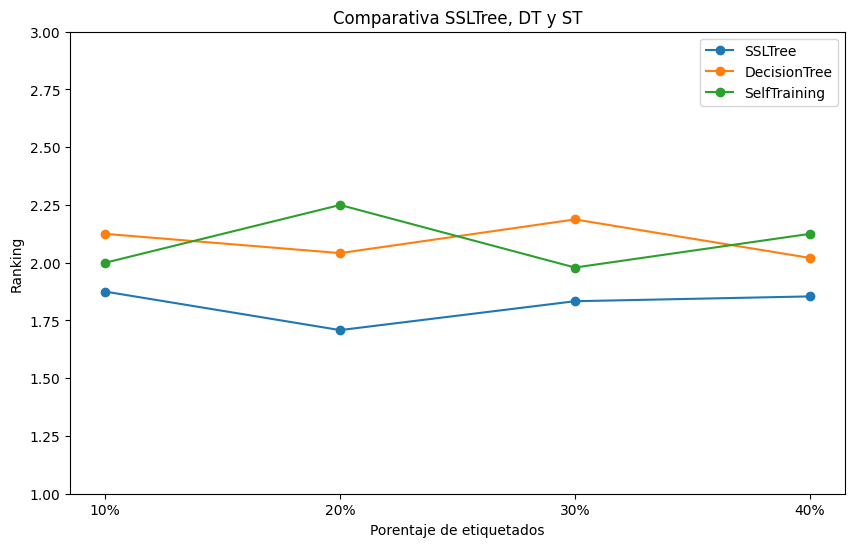

In [5]:
plt.figure(figsize=(10, 6))

classifiers = ["SSLTree", "DecisionTree", "SelfTraining"]
for j, classifier in enumerate(classifiers):
    plt.plot(["10%", "20%", "30%", "40%"], all_mean_rankings[j], marker="o", label=classifier)

plt.ylim(1, 3)
plt.xlabel("Porentaje de etiquetados")
plt.ylabel("Ranking")
plt.title("Comparativa SSLTree, DT y ST")

plt.legend()
plt.show()

# Nemenyi Test

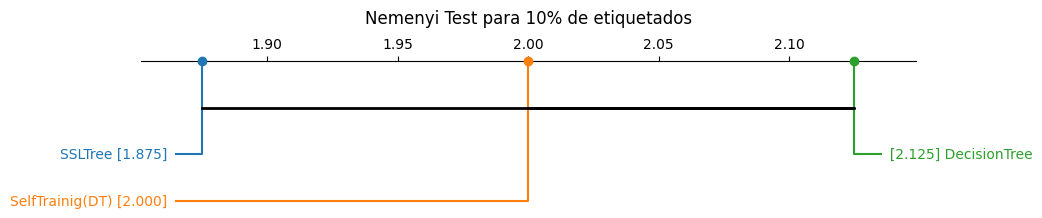

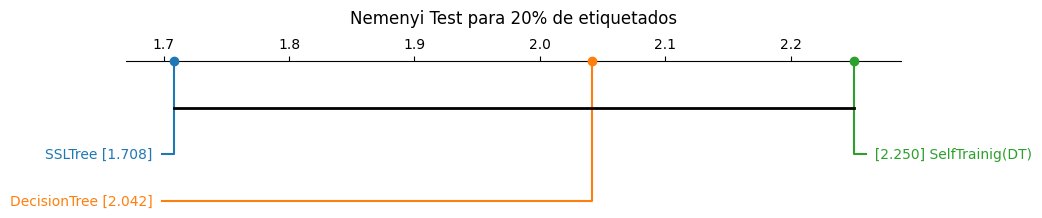

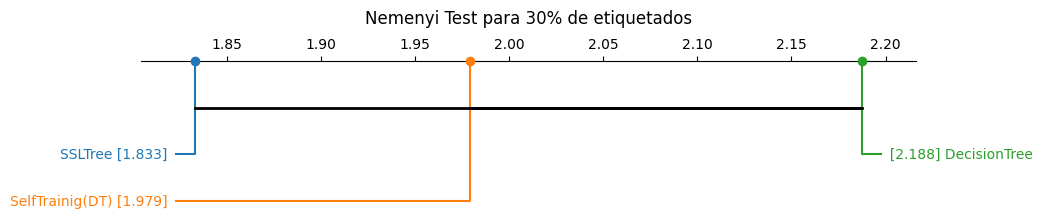

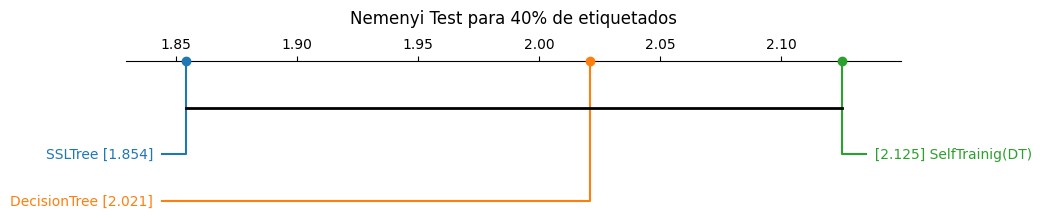

In [111]:
def nemenyi_test(matrix, p):

    dict_data = {
        'SSLTree': matrix[0, :],
        'DecisionTree': matrix[1, :],
        'SelfTrainig(DT)': matrix[2, :]
    }
    
    data_list = [dict_data[key] for key in dict_data]

    results = np.array(data_list).T

    nemenyi_result = sp.posthoc_nemenyi_friedman(results)

    ranks = pd.DataFrame(-results).rank(axis=1, method='average').mean(axis=0)
    ranks.index = list(dict_data.keys())
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        plt.figure(figsize=(10, 2), dpi=100)
        plt.title("Nemenyi Test para " + p + " de etiquetados", pad=10)
        sp.critical_difference_diagram(ranks, nemenyi_result, label_fmt_left='{label} [{rank:.3f}]  ',
                                       label_fmt_right='  [{rank:.3f}] {label}')
        plt.show()


nemenyi_test(all_means["10"], p="10%")
nemenyi_test(all_means["20"], p="20%")
nemenyi_test(all_means["30"], p="30%")
nemenyi_test(all_means["40"], p="40%")

# Evaluación Bagging (SSLTree), CoForest(SSLTree) y SelfTraining (Random Forest)

In [3]:
all_means = {}

for i, p in enumerate(["10", "20", "30", "40"]):
    print("PERCENTAGE:", p)
    means_ssl = []
    means_dt = []
    means_st = []
    for name in ["appendicitis", "iris", "zoo"]:
        print("\tDATASET:", name)
        m_ssl, m_dt, m_st = cross_val_ssl(name, p, criterion=CRITERION)

        np.save(f"comparativa-ensembles/{CRITERION}/{p}/{name}_means.npy", np.array([m_ssl, m_dt, m_st]))

        means_ssl.append(m_ssl)
        means_dt.append(m_dt)
        means_st.append(m_st)

    all_means[p] = np.stack((means_ssl, means_dt, means_st))
np.save(f"comparativa-ensembles/{CRITERION}/all_means.npy", all_means)
print("Resultados guardados")

PERCENTAGE: 10
	DATASET: appendicitis
Node(data=[[ 0.471  0.839  0.531  0.111  0.104  0.845  0.481 -1.   ]
 [ 0.884  0.821  0.927  0.069  0.107  0.78   0.837 -1.   ]
 [ 0.884  0.821  0.927  0.069  0.107  0.78   0.837 -1.   ]
 [ 0.116  0.161  0.057  0.333  0.14   0.177  0.049 -1.   ]
 [ 0.467  0.643  0.448  0.083  0.078  0.743  0.444 -1.   ]
 [ 0.302  0.482  0.258  0.069  0.048  0.599  0.263  0.   ]
 [ 0.48   0.857  0.547  0.056  0.053  0.836  0.487 -1.   ]
 [ 0.236  0.75   0.276  0.333  0.174  0.78   0.246 -1.   ]
 [ 0.573  0.75   0.59   0.361  0.392  0.956  0.619 -1.   ]
 [ 0.427  0.804  0.474  0.056  0.048  0.836  0.437  0.   ]
 [ 0.587  0.875  0.662  0.625  0.692  0.911  0.616 -1.   ]
 [ 0.409  0.75   0.437  0.097  0.082  0.765  0.399 -1.   ]
 [ 0.236  0.75   0.276  0.014  0.008  0.809  0.252 -1.   ]
 [ 0.32   0.946  0.415  0.208  0.15   0.765  0.319  0.   ]
 [ 0.453  0.946  0.556  0.167  0.152  0.834  0.461 -1.   ]
 [ 0.471  0.679  0.466  0.083  0.078  0.574  0.394 -1.   ]
 [ 0.493

InvalidParameterError: The 'n_estimators' parameter of RandomForestClassifier must be an int in the range [1, inf). Got DecisionTreeClassifier() instead.